# HW 2

*1a*. Plot `ONE` random walk of length `50`, I.e. 50 steps.  Report the `counts in each quadrant` and do a `Frequentist Chi square test` to test:  Ho: p1=p2=p3=p4=0.25.  For part 1b don’t do a plot, but do the Chi square test.

Part 1c is worth 2.5 points extra credit.  Do the `same` for part 1c as in 1a , I.e. a plot of one random walk and the chi-square test….( just plot ONE random walk of 50 steps- don’t plot 500 steps)

*2*. You must be able to plot the `histogram and density` on same plot for problem 2.

*3*.  For problems 2&3, try `n=10,000, 100,000, 1,000,000`.  Make a `table` of your results.  If your computer is `fast`, also `try 10,000,000`.  If your computer is slow, do as much as you can.

*4*.  Put ALL R / Python / Algol …. CODE IN THE `APPENDIX`.

*5*.  Problem 3 on the `multivariate normal `is extra credit worth 5 points.  If you try `problem 3d`, then you need to make a `two-way table` with epsilon across the rows or columns and n across the columns or rows.

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

66.322448 0.006005896202556343


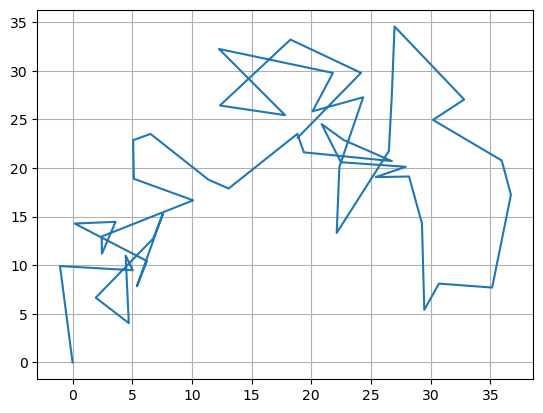

In [3]:
#1a
# consider the total length of x and y, we define the length of every step is between 1 and 10.
def random_walk(step_num):
    start_point = np.array([0.0,0.0])
    x_array = np.array([0.0])
    y_array = np.array([0.0])
    for step in range(step_num):
        step_length = np.random.uniform(1.0,10.0)
        angle = np.random.uniform(0.0,2*np.pi)
        step_x = np.cos(angle)*step_length
        step_y = np.sin(angle)*step_length
        start_point[0],start_point[1] = start_point[0]+step_x, start_point[1]+step_y 
        x_array  = np.append(x_array, start_point[0])
        y_array = np.append(y_array, start_point[1])

    collection = pd.DataFrame(y_array,index=x_array, columns = ['y']).reset_index()
    collection.columns = ['x','y']
    first_quarter_num = collection[(collection['x'] > 0) & (collection['y'] > 0)].shape[0]
    second_quarter_num = collection[(collection['x'] < 0) & (collection['y'] >0)].shape[0]
    third_quarter_num = collection[(collection['x'] < 0) & (collection['y'] < 0)].shape[0]
    fourth_quarter_num = collection[(collection['x'] > 0) & (collection['y'] < 0)].shape[0]
    num = [first_quarter_num,second_quarter_num,third_quarter_num,fourth_quarter_num]
    return x_array, y_array, num



def chi_square_test(num,step_num):
    observed = np.array(num)
    expected = np.array([step_num / 4] * 4)  # Expectation of every quadrant
    chi_square_stat = np.sum((observed - expected) ** 2 / expected)
    p_value = 1 - scipy.stats.chi2.cdf(chi_square_stat, df=3)  # degree of freedom is 3
    return chi_square_stat, p_value

chi_square_list = []
p_value_list = []
for time in range(10000):
    x_array, y_array, num = random_walk(step_num=50)
    chi_square_stat,p_value = chi_square_test(num=num,step_num=50)
    chi_square_list.append(chi_square_stat)
    p_value_list.append(p_value)
print(np.mean(chi_square_list), np.mean(p_value_list))

one_x_array, one_y_array, one_num = random_walk(step_num=50)
plt.grid()
plt.plot(one_x_array,one_y_array)
plt.show()    

In [74]:
# 1b repeat the former steps with total_number = 100
x_array,y_array,num = random_walk(step_num=500)
chi_square_stat,p_value = chi_square_test(num, step_num=500)
print(num, chi_square_stat, p_value)

[112, 375, 13, 0] 726.704 0.0


66.11641599999999 0.0075106708051854865


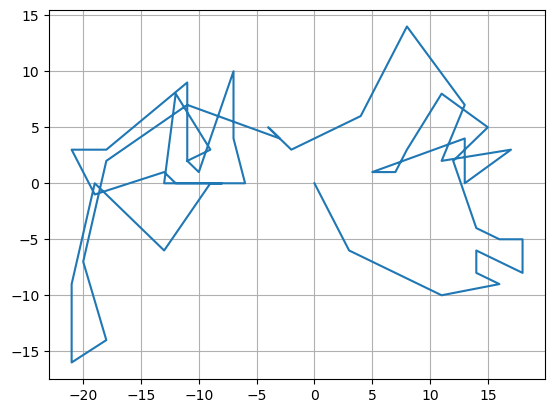

In [75]:
# 1c, draw on the lattice which means x and y should be integer
def random_integer(step_num):
    start_point = np.array([0,0])
    x_array = np.array([0])
    y_array = np.array([0])
    for step in range(step_num):
        step_length = np.random.uniform(1.0,10.0)
        angle = np.random.uniform(0.0,2*np.pi)
        step_x = np.cos(angle)*step_length
        step_y = np.sin(angle)*step_length
        start_point[0],start_point[1] = start_point[0]+step_x, start_point[1]+step_y 
        x_array  = np.append(x_array, start_point[0])
        y_array = np.append(y_array, start_point[1])

    collection = pd.DataFrame(y_array,index=x_array, columns = ['y']).reset_index()
    collection.columns = ['x','y']
    first_quarter_num = collection[(collection['x'] > 0.) & (collection['y'] > 0.)].shape[0]
    second_quarter_num = collection[(collection['x'] < 0.) & (collection['y'] >0.)].shape[0]
    third_quarter_num = collection[(collection['x'] < 0.) & (collection['y'] < 0.)].shape[0]
    fourth_quarter_num = collection[(collection['x'] > 0.) & (collection['y'] < 0.)].shape[0]
    num = [first_quarter_num,second_quarter_num,third_quarter_num,fourth_quarter_num]
    return x_array, y_array, num



def chi_square_integer(num,step_num):
    observed = np.array(num)
    expected = np.array([step_num / 4] * 4)  # Expectation of every quadrant
    chi_square_stat = np.sum((observed - expected) ** 2 / expected)
    p_value = 1 - scipy.stats.chi2.cdf(chi_square_stat, df=3)  # degree of freedom is 3
    return chi_square_stat, p_value


chi_square_list = []
p_value_list = []
for time in range(10000):
    x_array, y_array, num = random_walk(step_num=50)
    chi_square_stat,p_value = chi_square_test(num=num,step_num=50)
    chi_square_list.append(chi_square_stat)
    p_value_list.append(p_value)
print(np.mean(chi_square_list), np.mean(p_value_list))

x_lattice, y_lattice, lattice_num = random_integer(step_num = 50)
chi_square_stat, p_value = chi_square_integer(num=num, step_num = 50)
plt.grid()
plt.plot(x_lattice,y_lattice)
plt.show()




In [76]:
# 1c(1b with steps=500)
x_array_lattice,y_array_lattice,num = random_integer(step_num=500)
chi_square_stat,p_value = chi_square_integer(num, step_num=500)
print(num, chi_square_stat, p_value)

[225, 104, 67, 52] 153.072 0.0


In [77]:
def simulate_random_walks(num_walks, step_num):
    quadrant_counts = np.zeros(4)  # 用于存储每个象限的计数

    for _ in range(num_walks):
        x, y = 0, 0 # 从(0,0)开始
        for _ in range(step_num):
            step_length = np.random.uniform(1., 10.)
            angle = np.random.uniform(0., 2 * np.pi)
            x += np.cos(angle) * step_length
            y += np.sin(angle) * step_length

        # 确定最终位置所在的象限
        if x > 0. and y > 0.:
            quadrant_counts[0] += 1
        elif x < 0. and y > 0.:
            quadrant_counts[1] += 1
        elif x < 0. and y < 0.:
            quadrant_counts[2] += 1
        elif x > 0. and y < 0.:
            quadrant_counts[3] += 1

    proportions = quadrant_counts / num_walks  # 计算每个象限的比例
    return proportions

# 进行模拟
proportions = simulate_random_walks(num_walks=100, step_num=50)
print(proportions)
chi_square_stat, p_value = chi_square_integer(num=proportions, step_num=10000)
print(f"Chi-square statistic: {chi_square_stat}, p-value: {p_value}")

print(proportions)  # 输出每个象限的比例



[0.24 0.14 0.25 0.37]
Chi-square statistic: 9998.00011064, p-value: 0.0
[0.24 0.14 0.25 0.37]


From each of the following distributions: (i) draw `10,000` deviates; (ii) compute the `sample average` and `sample SD` and compare these numbers to the `true values`; 3)draw a `histogram` of the deviates along with a plot of the true density.

try `n=10,000, 100,000, 1,000,000`.  Make a `table` of your results.  If your computer is `fast`, also `try 10,000,000`.

*deviates* actually is the random variables, which belongs to the given distributions.

In [7]:
# generate the random variables which belongs to this distribution.
def generate_deviate(distribution, alpha, beta_param, size):
    deviates =  distribution.rvs(alpha, beta_param, size=size)
    return deviates
# compare the mean value and the standard deviation.
def sample_true_compare(deviates):
    deviate_mean = np.mean(deviates)
    deviate_std = np.std(deviates)
    return deviate_mean,deviate_std
# select the table size
size_table = [10000,100000,1000000,10000000]
total_table = np.array([])

7.680786947850127e-05 4.1101098352258614e-05


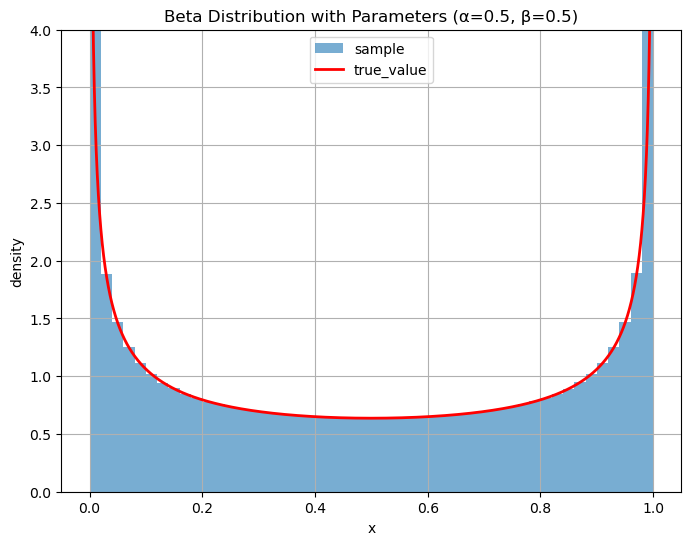

In [8]:
# beta(0.5,0.5) beta
import math
from scipy.stats import beta
# alpha, beta = 0.5,0.5
alpha = 0.5
beta_param = 0.5
# generate the deviates, choose the biggest table to plot
deviates = generate_deviate(beta,alpha,beta_param,10000000)
# compare the value
mean,std = sample_true_compare(deviates)
true = alpha/(alpha+beta_param)
var = alpha*beta_param/((alpha+beta_param)**2*(alpha+beta_param+1))
mean_d = abs(mean-true)
var_d = abs(std-var**(0.5))
print(mean_d, var_d)
# draw the plot
plt.figure(figsize=(8, 6))
plt.grid()
plt.hist(deviates, bins=50, density=True, alpha=0.6, label='sample')
# true value
x = np.linspace(0,1,10000000)
y = beta.pdf(x,0.5,0.5)
plt.plot(x,y,'r-',lw=2,label="true_value")

plt.ylim([0,4.0])
plt.xlabel('x')
plt.ylabel('density')
plt.title("Beta Distribution with Parameters (α={}, β={})".format(alpha, beta_param))
plt.legend()
plt.show()

In [18]:
# 10,000, 100,000, 1,000,000, 10,000,000
beta_table = np.array([])
for size in size_table:
    deviates = generate_deviate(beta,alpha,beta_param,size)
# compare the value
    mean,std = sample_true_compare(deviates)
    true = alpha/(alpha+beta_param)
    var = alpha*beta_param/((alpha+beta_param)**2*(alpha+beta_param+1))
    mean_d = abs(mean-true)
    var_d = abs(std-var**(0.5))
    difference = np.array([mean_d,var_d])
    beta_table = np.append(beta_table,difference)
beta_table = beta_table.reshape(4,2)
beta_table

(array([3.76540778e-03, 1.11745145e-03, 1.05838334e-04, 7.52354522e-05]),
 array([[3.76540778e-03, 2.17413703e-03],
        [1.11745145e-03, 4.15203509e-04],
        [1.05838334e-04, 2.32189153e-04],
        [7.52354522e-05, 3.52187337e-05]]))

0.0001356000000001245 3.521873371264972e-05


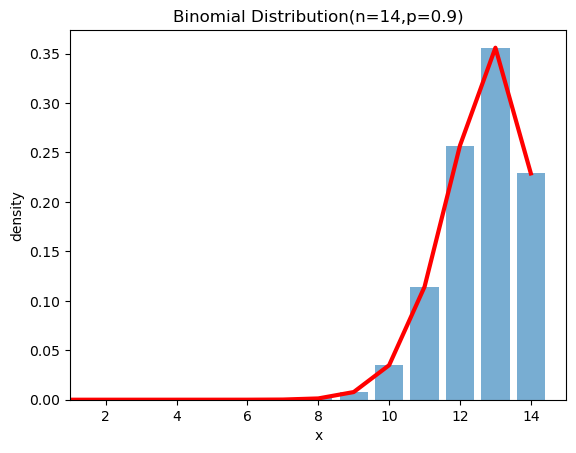

In [19]:
# Question 2
# Binomial(14,0.9) multinomial
from scipy.stats import binom
n=14
p=0.9
deviates = binom.rvs(14,0.9,size=10000000)
# compare the value
mean,std = sample_true_compare(deviates)
true = n*p
var = n*p*(1-p)
mean_d = abs(mean-true)
std_d = abs(std-var**(0.5))
print(mean_d, var_d)
# bionomial density
density_list = []
for i in range(15):
    nums = deviates[deviates==i]
    count = np.count_nonzero(nums)
    percentage = count/10000000
    density_list.append(percentage)

# draw plot
x = np.linspace(0,14,15)
plt.bar(x, density_list, alpha=0.6, label='Density')
# because bionomial distribution has only integer numbers.
plt.plot(density_list)
plt.plot(x,binom.pmf(x,14,0.9),color='r',lw=3,label='true')
plt.xlim((1,15))
plt.xlabel('x')
plt.ylabel('density')
# true values' result
plt.title("Binomial Distribution(n=14,p=0.9)")
plt.show()

In [21]:
binom_table = np.array([])
for size in size_table:
    deviates = binom.rvs(14,0.9,size=size)
# compare the value
    mean,std = sample_true_compare(deviates)
    true = n*p
    var = n*p*(1-p)
    mean_d = abs(mean-true)
    std_d = abs(std-var**(0.5))
    difference = np.array([mean_d,var_d])
    binom_table= np.append(binom_table,difference)
binom_table = binom_table.reshape(4,2)
binom_table

array([[1.90000000e-03, 3.52187337e-05],
       [5.77000000e-03, 3.52187337e-05],
       [1.09700000e-03, 3.52187337e-05],
       [1.44900000e-04, 3.52187337e-05]])

0.0012814903770781427 0.9282432410455481


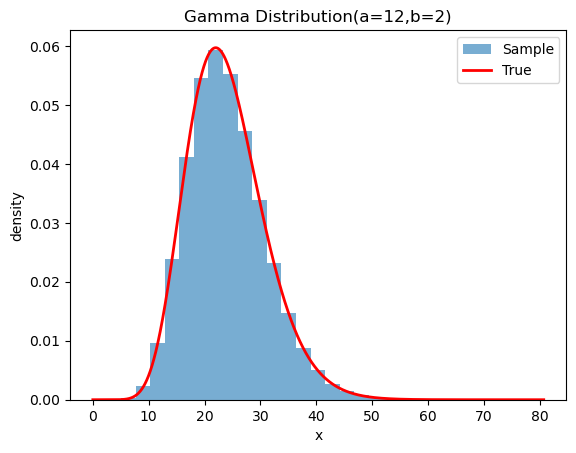

In [22]:
# Gamma(12,2) gamma
from scipy.stats import gamma
alpha = 12  # k (shape parameter)
beta = 2   # θ (scale parameter)

# generate 10000 samples.
deviates = gamma.rvs(alpha, scale=beta, size=10000000)
# compare the value
mean,std = sample_true_compare(deviates)
true = alpha*beta
var = alpha**2/beta**2

mean_d = abs(mean-true)
var_d = abs(std-var**(0.5))
print(mean_d,var_d)
# Create a histogram of the sampled data
plt.hist(deviates, bins=30, density=True, alpha=0.6, label='Sample')

# Generate the true gamma distribution for comparison
x = np.linspace(0, max(deviates), 10000000)
pdf = gamma.pdf(x, a=alpha, scale=beta)

# Plot the true gamma distribution line
plt.plot(x, pdf, 'r-', lw=2, label='True')
plt.legend()
plt.xlabel('x')
plt.ylabel('density')
plt.title("Gamma Distribution(a={},b={})".format(12,2))
plt.show()

In [25]:
gamma_table = np.array([])
for size in size_table:
    deviates = gamma.rvs(alpha, scale=beta, size=size)
# compare the value
    mean,std = sample_true_compare(deviates)
    true = alpha*beta
    var = alpha**2/beta**2
    mean_d = abs(mean-true)
    var_d = abs(std-var**(0.5))
    difference = np.array([mean_d,var_d])
    gamma_table= np.append(gamma_table,difference)
gamma_table = gamma_table.reshape(4,2)
gamma_table

array([[2.81900315e-02, 8.35849095e-01],
       [2.74581467e-02, 9.25373502e-01],
       [1.03851144e-02, 9.32195123e-01],
       [3.79806643e-04, 9.27095599e-01]])

The mean difference is 0.13634464348384512, the SD difference is 0.08625971746718597


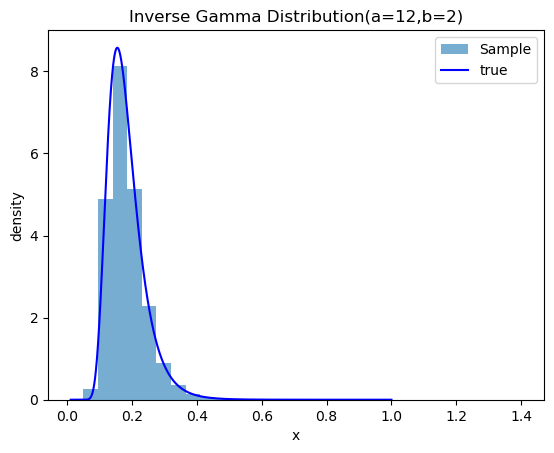

In [26]:
# IG(12,2) invgamma
from scipy.stats import invgamma

alpha=12
beta=2
deviates = invgamma.rvs(12,scale=2,size=10000000)
# compare the mean value and the standard deviation.
sample_mean = np.mean(deviates)
sample_std = np.std(deviates)
true_mean = beta_param/(alpha-1)
true_std = np.power(beta_param**2/(alpha-1)**2*(alpha-2),0.5)
print('The mean difference is {}, the SD difference is {}'.format(np.abs(sample_mean-true_mean), np.abs(sample_std-true_std)))
# draw the plot
plt.hist(deviates, bins=30,density=True, alpha=0.6,label='Sample')
# Values for the x-axis (positive values since inverse gamma is defined for x > 0)
x = np.linspace(0.01, 1, 10000000)  # Avoid 0 to prevent undefined values

# Calculate the PDF of the inverse gamma distribution
pdf = invgamma.pdf(x, alpha, scale=beta)

plt.plot(x, pdf, 'b-', label='true')

# Add labels, title, and legend
plt.title('Inverse Gamma Distribution(a=12,b=2)')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()


In [27]:
invgamma_table = np.array([])
for size in size_table:
    deviates = invgamma.rvs(12,scale=2,size=size)
# compare the mean value and the standard deviation.
    sample_mean = np.mean(deviates)
    sample_std = np.std(deviates)
    true_mean = beta_param/(alpha-1)
    true_std = np.power(beta_param**2/(alpha-1)**2*(alpha-2),0.5)   
    mean_d = abs(sample_mean-true_mean)
    var_d = abs(sample_std-true_std)
    difference = np.array([mean_d,var_d])
    invgamma_table= np.append(invgamma_table,difference)
invgamma_table = invgamma_table.reshape(4,2)
invgamma_table

array([[0.13630183, 0.08649591],
       [0.13658972, 0.08616075],
       [0.13636774, 0.08619999],
       [0.13635969, 0.08622697]])

The mean difference is 0.000588444146233158, the SD difference is 2.001348856842318


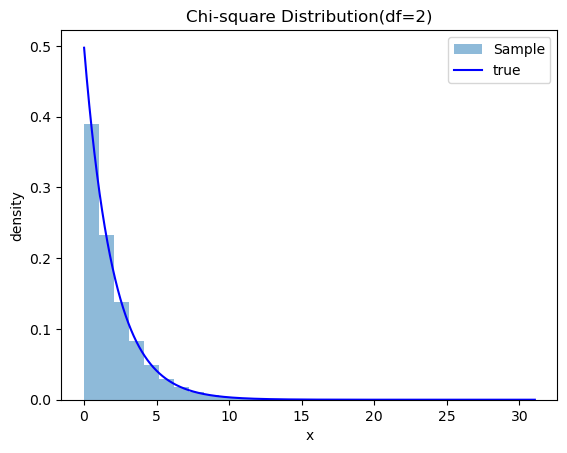

In [28]:
# chi-square(2)--scipy.stats.chi2
from scipy.stats import chi2
df = 2
deviates = chi2.rvs(df=2,size=10000000)
# compare the mean value and the standard deviation.
sample_mean = np.mean(deviates)
sample_std = np.std(deviates)
true_mean = df
true_std = 2*df
print('The mean difference is {}, the SD difference is {}'.format(np.abs(sample_mean-true_mean), np.abs(sample_std-true_std)))
# draw the plot

# Values for the x-axis (positive values since inverse gamma is defined for x > 0)
x = np.linspace(0.01, max(deviates), 10000000)  # Avoid 0 to prevent undefined values
plt.hist(deviates, bins=30,density=True, alpha=0.5,label='Sample')
# Calculate the PDF of the inverse gamma distribution
pdf = chi2.pdf(x, df=2)
# Plotting the PDF
plt.plot(x, pdf, 'b-', label='true')

# Add labels, title, and legend
plt.title('Chi-square Distribution(df=2)')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

In [30]:
# chi-square(2)--scipy.stats.chi2
chi2_table = np.array([])
for size in size_table:
    deviates = chi2.rvs(df=2,size=size)
# compare the mean value and the standard deviation.
    sample_mean = np.mean(deviates)
    sample_std = np.std(deviates)
    true_mean = 2
    true_std = 2*2
    mean_d = abs(sample_mean-true_mean)
    var_d = abs(sample_std-true_std)
    difference = np.array([mean_d,var_d])
    chi2_table= np.append(chi2_table,difference)
chi2_table = chi2_table.reshape(4,2)
chi2_table

array([[5.75725314e-03, 2.01238809e+00],
       [9.40977934e-03, 1.98836356e+00],
       [5.32950587e-04, 2.00056745e+00],
       [1.00573461e-03, 1.99999681e+00]])

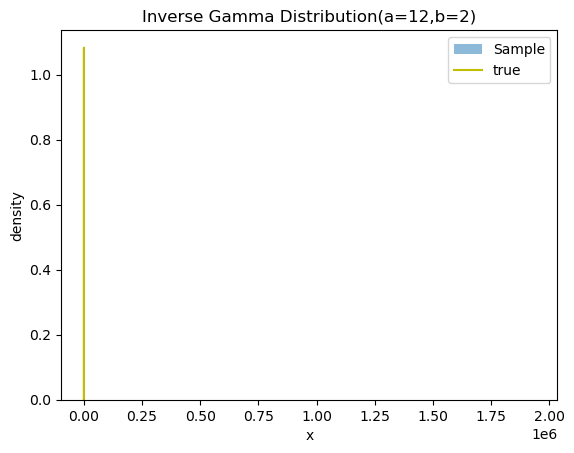

In [32]:
# inverse-chi-square(2), inverse chi-square(2) = inverse gamma (1,0.5)
alpha=1
beta=0.5
deviates = invgamma.rvs(1,scale=0.5,size=10000000)
# compare the mean value and the standard deviation.
# draw the plot
# Values for the x-axis (positive values since inverse gamma is defined for x > 0)
plt.hist(deviates, bins=30,density=True, alpha=0.5,label='Sample')
# Calculate the PDF of the inverse gamma distribution
pdf = invgamma.pdf(x, alpha, scale=beta)
# Plotting the PDF
# plt.plot(x, pdf, 'b-', lw=3,label='true_drop_2')
# plt.plot(x2,pdf2,'b-',lw=3)

x = np.linspace(0.01,20,10000000)
pdf = invgamma.pdf(x,alpha,scale=beta)

plt.plot(x, pdf,'y-',label = 'true')

# Add labels, title, and legend
plt.title('Inverse Gamma Distribution(a=12,b=2)')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()


In [40]:
# mean_table
import pandas as pd
def table(position):
    mean_table = np.array([binom_table[:,position], beta_table[:,0],gamma_table[:,0],invgamma_table[:,0],chi2_table[:,0]])
    table = pd.DataFrame(mean_table).T.reset_index()
    table.columns = ['index','Binomial(14,0.9)','Beta(0.5,0.5)','Gamma(12,2)','IG(12,2)','Chi-square(2)']
    table['index'] = np.array(['n=10,000','n=100,000','n=1,000,000','n=10,000,000'])
    table.set_index(['index'],inplace=True)
    return table
# table.T

,"Binomial(14,0.9)","Beta(0.5,0.5)","Gamma(12,2)","IG(12,2)",Chi-square(2)
index,,,,,
"n=10,000",0.001900,0.003765,0.028190,0.136302,0.005757
"n=100,000",0.005770,0.001117,0.027458,0.136590,0.009410
"n=1,000,000",0.001097,0.000106,0.010385,0.136368,0.000533
"n=10,000,000",0.000145,0.000075,0.000380,0.136360,0.001006


In [ ]:
import pandas as pd
mean_table = np.array([binom_table[:,1], beta_table[:,1],gamma_table[:,0],invgamma_table[:,0],chi2_table[:,0]])
table = pd.DataFrame(mean_table).T.reset_index()
table.columns = ['index','Binomial(14,0.9)','Beta(0.5,0.5)','Gamma(12,2)','IG(12,2)','Chi-square(2)']
table['index'] = np.array(['n=10,000','n=100,000','n=1,000,000','n=10,000,000'])
table.set_index(['index'],inplace=True)

Draw a sample of size `10,000` from the `trivariate normal distribution` with mean
`(0,0,0)` and variance-covariance matrix.

Draw pictures of the biggest size `1,000,000`.

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import multinomial
from matplotlib.ticker import LinearLocator, FormatStrFormatter
sizes = [100000, 1000000,10000000]

In [4]:
# 3a
cov_matrix = np.array([1,4.5,9.0,4.5,25,49,9,49,100])
cov_matrix = cov_matrix.reshape(3,3)
sample = scipy.stats.multivariate_normal.rvs(mean=(0,0,0),cov=cov_matrix,size=10000)

Draw a `histogram` of the X1 `deviates`, along with the `true marginal`. Compute the
sample `average `and `sample SD `and compare these numbers to the true values.

0.0014719364666444207 0.008983944486638529


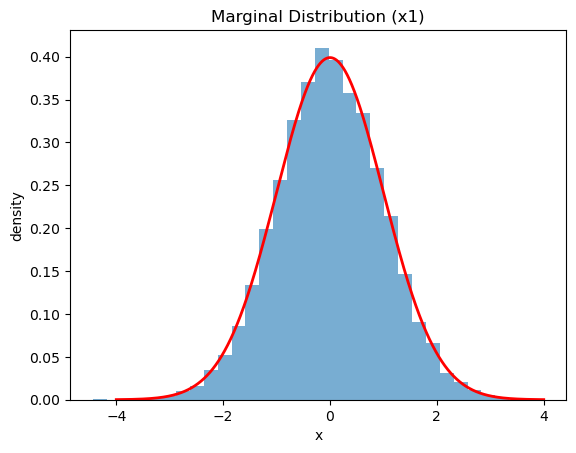

In [5]:
# 3b
def value_compare(mean,cov,size,t_mean,t_std):
    sammple = scipy.stats.multivariate_normal.rvs(mean,cov,size)
    x1 =  np.array([])
    for i in range(len(sample)):
        x1_value = sample[i][0]
        x1 = np.append(x1,x1_value)
# compare the average and SD
    mean,std = np.mean(x1),np.std(x1)
    t_mean = t_mean
    t_std = t_std
    mean_d = abs(mean-t_mean)
    std_d = abs(std-t_std)
    return x1, mean_d, std_d
x1, mean_d,std_d = value_compare(mean=(0,0,0),cov=cov_matrix,size=10000,t_mean=0,t_std=1)
print(mean_d,std_d)
plt.hist(x1,bins=30,density=True,alpha=0.6,label='sample')
x = np.linspace(-4,4,10000)
pdf = scipy.stats.multivariate_normal.pdf(x)
plt.plot(x,pdf,'r-',lw=2,label='true')
plt.title("Marginal Distribution (x1)")
plt.xlabel('x')
plt.ylabel('density')
# marginal line
plt.show()

In [6]:
# 3b with the sample size=100,000; size=1,000,000 and 10,000,000
x1_table = np.array([])
for size in sizes:
    x1,mean_d,std_d = value_compare(mean=(0,0,0),cov=cov_matrix,size=size,t_mean=0,t_std=1)
    difference = np.array([mean_d,std_d])
    x1_table = np.append(x1_table,difference)
x1_table

array([0.00147194, 0.00898394, 0.00147194, 0.00898394, 0.00147194,
       0.00898394])

Draw a sample of `size 10,000` from the `conditional distribution` p(X,|X2, X3), take `X2
= X3 = 1`. Compute the sample `mean` and `sample SD` and compare these numbers to the
true values. Draw a `histogram` of the simulated values, along with the `true conditional
distribution`.

0.13636363636363658 0.1818181818181801


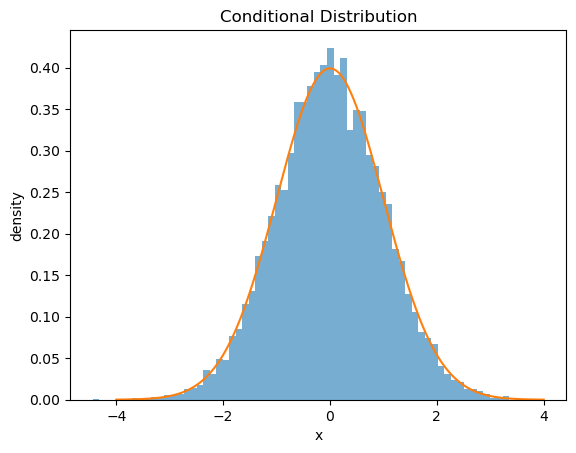

In [23]:
matrix_2_3 = np.array([25,49,49,100])
matrix_2_3 = matrix_2_3.reshape(2,2)
inverse_matrix_2_3 = np.linalg.inv(matrix_2_3)
# for conditional distribution 
a_corr = np.array([4.5,9.0])
miu_2_3 = np.array([1,1])
matrix_sum = np.dot(a_corr,inverse_matrix_2_3)
matrix_sum = np.dot(matrix_sum,miu_2_3)
# x1|x2=1,x3=1
miu = 0 + matrix_sum
# variance
var_matrix = np.dot(a_corr, inverse_matrix_2_3)
var_matrix = np.dot(var_matrix,a_corr)
var = 1 - var_matrix
print(miu,var)
cov_matrix = cov_matrix.reshape(3,3)
x1,mean_d,std_d = value_compare(mean = miu,cov=var,size=10000, t_mean=0,t_std = 1)
plt.hist(x1,bins='auto',density=True, alpha=0.6)
x = np.linspace(-4.,4.,10000)
pdf = scipy.stats.multivariate_normal.pdf(x)
plt.plot(x,pdf)
plt.title("Conditional Distribution")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

In [25]:
# 3c with the sample size=100,000; size=1,000,000 and 10,000,000
sizes = [1000000,10000000,100000000]
conditional_table = np.array([])
for size in sizes:
    x1, mean_d, std_d = value_compare(mean = (0,1,1),cov=cov_matrix,size=size, t_mean=miu,t_std = var**0.5)
    conditional = np.array([mean_d,std_d])
    conditional_table  = np.append(conditional_table,conditional)
conditional_table



array([0.13783557, 0.56461462, 0.13783557, 0.56461462, 0.13783557,
       0.56461462])

## Sample Solution